In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install igraph leidenalg
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 100.0 MB/s eta 0:00:00


In [4]:
import scanpy as sc
import pandas as pd
from pathlib import Path

DATA = Path("/content/drive/MyDrive/Genomic_for_Sci_Tech/Data/Project")


# Cell Level

In [ ]:

# ===== 1. Load the data =====
h5ad_path = DATA / "SEAAD_MTG_RNAseq_2000HVG_subset_class.h5ad"
meta_adata = sc.read_h5ad(h5ad_path)

print("=== AnnData Loaded ===")
print(meta_adata)

=== AnnData Loaded ===
AnnData object with n_obs × n_vars = 1378211 × 2000
    obs: 'Overall AD neuropathological Change', 'Age at Death', 'Sex', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)', 'specify other race', 'Hispanic/Latino', 'Class confidence', 'Class', 'Subclass confidence', 'Subclass'
    var: 'gene_ids', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'


In [ ]:
meta_adata

In [ ]:
# ===== 1. Load the data =====
h5ad_path = DATA / "SEAAD_MTG_2000HVG_High_vs_NotAD_balanced_normalized.h5ad"
norm_adata = sc.read_h5ad(h5ad_path)

print("=== AnnData Loaded ===")
print(norm_adata)

=== AnnData Loaded ===
AnnData object with n_obs × n_vars = 282999 × 2000
    obs: 'Overall AD neuropathological Change', 'Age at Death', 'Sex', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)', 'specify other race', 'Hispanic/Latino', 'disease_label'
    var: 'gene_ids', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'log1p'


In [ ]:
meta_adata

AnnData object with n_obs × n_vars = 1378211 × 2000
    obs: 'Overall AD neuropathological Change', 'Age at Death', 'Sex', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)', 'specify other race', 'Hispanic/Latino', 'Class confidence', 'Class', 'Subclass confidence', 'Subclass'
    var: 'gene_ids', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'

In [ ]:
norm_adata

AnnData object with n_obs × n_vars = 282999 × 2000
    obs: 'Overall AD neuropathological Change', 'Age at Death', 'Sex', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)', 'specify other race', 'Hispanic/Latino', 'disease_label'
    var: 'gene_ids', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'log1p'

In [ ]:
for x in meta_adata.obs.columns:
    if x not in norm_adata.obs.columns:
        print(x)

Class confidence
Class
Subclass confidence
Subclass


In [ ]:
for x in norm_adata.obs.columns:
    if x not in meta_adata.obs.columns:
        print(x)

disease_label


In [ ]:
cols_to_add = ["Class confidence", "Class",
               "Subclass confidence", "Subclass"]

# Subset meta_adata.obs to rows that appear in norm_adata
meta_subset = meta_adata.obs.loc[norm_adata.obs_names, cols_to_add]

# Add the columns into norm_adata.obs
norm_adata.obs[cols_to_add] = meta_subset

In [ ]:
for x in meta_adata.obs.columns:
    if x not in norm_adata.obs.columns:
        print(x)

In [ ]:
norm_adata

AnnData object with n_obs × n_vars = 282999 × 2000
    obs: 'Overall AD neuropathological Change', 'Age at Death', 'Sex', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)', 'specify other race', 'Hispanic/Latino', 'disease_label', 'Class confidence', 'Class', 'Subclass confidence', 'Subclass'
    var: 'gene_ids', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'log1p'

In [ ]:
out_path = DATA / "EDA_version.h5ad"

In [ ]:
norm_adata.write(out_path, compression="gzip")

/usr/local/lib/python3.12/dist-packages/anndata/_io/utils.py:243: FutureWarning: Forward slashes will be disallowed in h5 stores in the next minor release
  return func(*args, **kwargs)


In [ ]:
norm_adata = sc.read_h5ad(out_path)

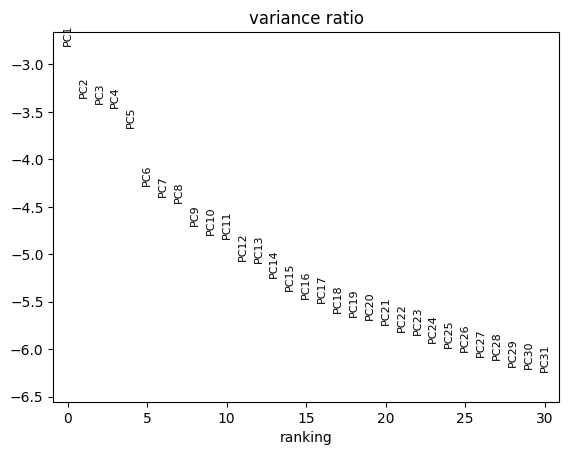

In [ ]:
import scanpy as sc

adata = norm_adata  # rename for convenience

#pca
sc.tl.pca(adata, n_comps=50, svd_solver="arpack")
sc.pl.pca_variance_ratio(adata, log=True)

# Neighbors graph from PCA
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)

# UMAP
sc.tl.umap(adata)

In [ ]:
#leiden
sc.tl.leiden(adata, resolution=0.4, key_added="leiden_clusters")

In [ ]:
# Create a simple Race category
race_cols = [
    "Race (choice=White)",
    "Race (choice=Black/ African American)",
    "Race (choice=Asian)",
    "Race (choice=American Indian/ Alaska Native)",
    "Race (choice=Native Hawaiian or Pacific Islander)",
    "Race (choice=Unknown or unreported)",
    "Race (choice=Other)"
]

def collapse_race(row):
    for col in race_cols:
        if row[col] == 1:
            return col.replace("Race (choice=", "").replace(")", "")
    return "Unknown"

adata.obs["RaceSimple"] = adata.obs.apply(collapse_race, axis=1).astype("category")

In [ ]:
out_path = DATA / "EDA_processed.h5ad"

In [ ]:
adata.write(out_path, compression="gzip")

/usr/local/lib/python3.12/dist-packages/anndata/_io/utils.py:243: FutureWarning: Forward slashes will be disallowed in h5 stores in the next minor release
  return func(*args, **kwargs)


In [ ]:
adata = sc.read_h5ad(out_path)

In [ ]:
adata.obs['disease_label']

,disease_label
exp_component_name,
AAACAGCCAAACATAG-L8XR_210916_02_B11-1131607954,0
AAACAGCCAACAACAA-L8XR_210902_02_B08-1131257169,1
AAACAGCCAACACTTG-L8XR_210902_02_D08-1131257170,1
AAACAGCCAACTAGGG-L8XR_210729_01_E09-1122543707,1
AAACAGCCAACTGGCT-L8XR_210916_02_B11-1131607954,0
...,...
TTTGTTGTCTTCTCAA-L8TX_210430_01_B04-1153814208,0
TTTGTTGTCTTGATTC-L8TX_210415_01_E11-1153814186,1
TTTGTTGTCTTGCAAG-L8TX_210729_01_G12-1153814338,1


In [ ]:
sc.settings.figdir = DATA

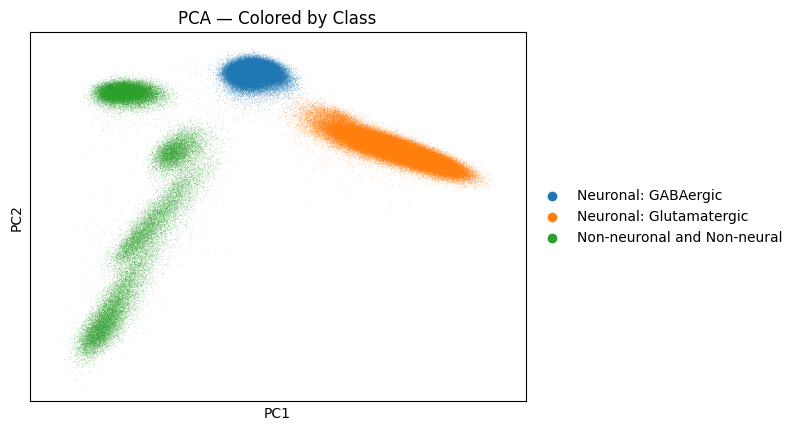

In [ ]:
sc.pl.pca(adata, color="Class", title="PCA — Colored by Class",save="_class.png")

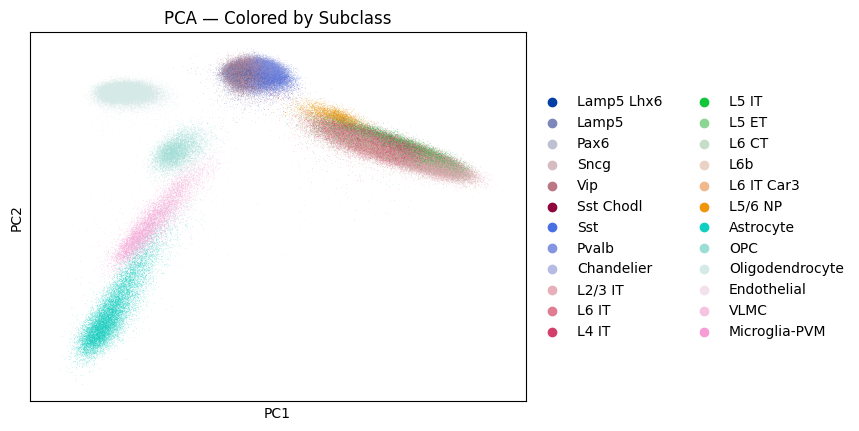

In [ ]:
sc.pl.pca(adata, color="Subclass", title="PCA — Colored by Subclass",save="_subclass.png")


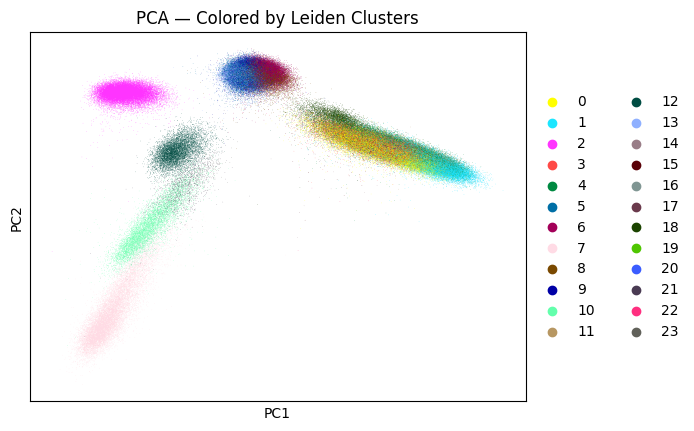

In [ ]:
sc.pl.pca(adata, color="leiden_clusters", title="PCA — Colored by Leiden Clusters",save="_leiden.png")


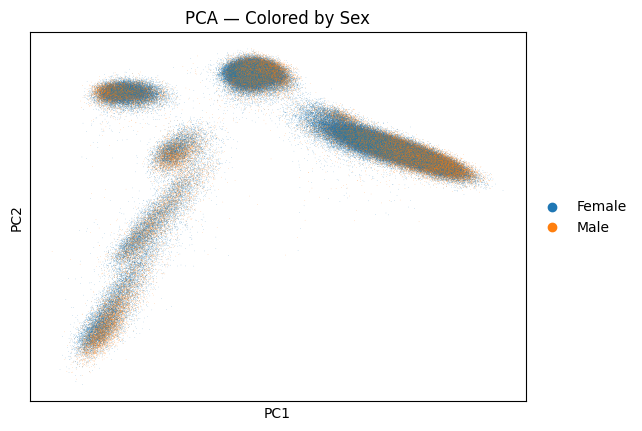

In [ ]:
sc.pl.pca(adata, color="Sex", title="PCA — Colored by Sex",save="_sex.png")

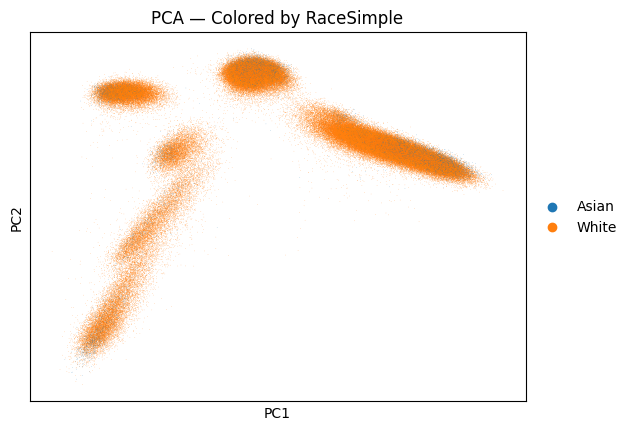

In [ ]:
sc.pl.pca(adata, color="RaceSimple", title="PCA — Colored by RaceSimple",save="_race.png")

In [ ]:
for col in race_cols:
    print(col, adata.obs[col].unique()[:10])

Race (choice=White) ['Unchecked', 'Checked']
Categories (2, object): ['Checked', 'Unchecked']
Race (choice=Black/ African American) ['Unchecked']
Categories (1, object): ['Unchecked']
Race (choice=Asian) ['Checked', 'Unchecked']
Categories (2, object): ['Checked', 'Unchecked']
Race (choice=American Indian/ Alaska Native) ['Unchecked']
Categories (1, object): ['Unchecked']
Race (choice=Native Hawaiian or Pacific Islander) ['Unchecked']
Categories (1, object): ['Unchecked']
Race (choice=Unknown or unreported) ['Unchecked']
Categories (1, object): ['Unchecked']
Race (choice=Other) ['Unchecked']
Categories (1, object): ['Unchecked']


In [ ]:
# Create a simple Race category
race_cols = [
    "Race (choice=White)",
    "Race (choice=Black/ African American)",
    "Race (choice=Asian)",
    "Race (choice=American Indian/ Alaska Native)",
    "Race (choice=Native Hawaiian or Pacific Islander)",
    "Race (choice=Unknown or unreported)",
    "Race (choice=Other)"
]

def collapse_race(row):
    for col in race_cols:
        if row[col] == "Checked":
            return col.replace("Race (choice=", "").replace(")", "")
    return "Unknown"

adata.obs["RaceSimple"] = adata.obs.apply(collapse_race, axis=1).astype("category")

In [ ]:
adata.obs["Hispanic/Latino"].unique()

['No', 'Unknown']
Categories (2, object): ['Unknown', 'No']

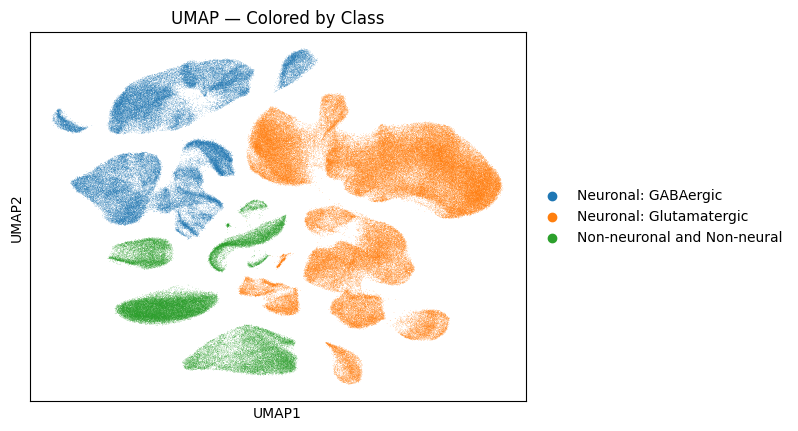

In [ ]:
sc.pl.umap(adata, color="Class", title="UMAP — Colored by Class",save="_class.png")

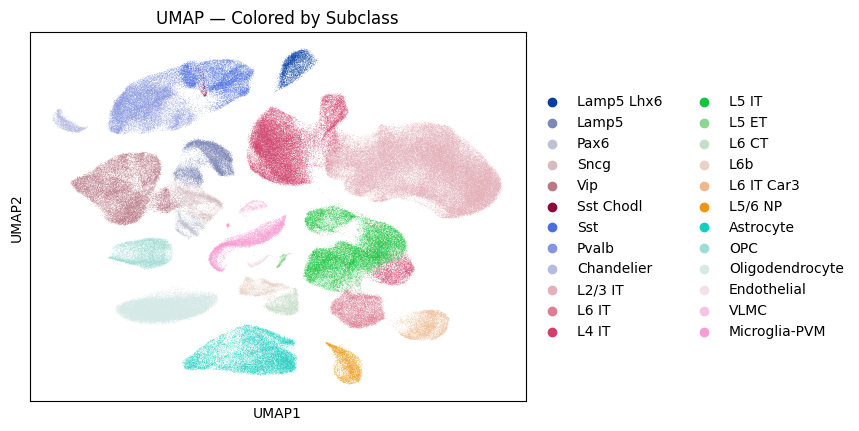

In [ ]:
sc.pl.umap(adata, color="Subclass", title="UMAP — Colored by Subclass",save="_subclass.png")

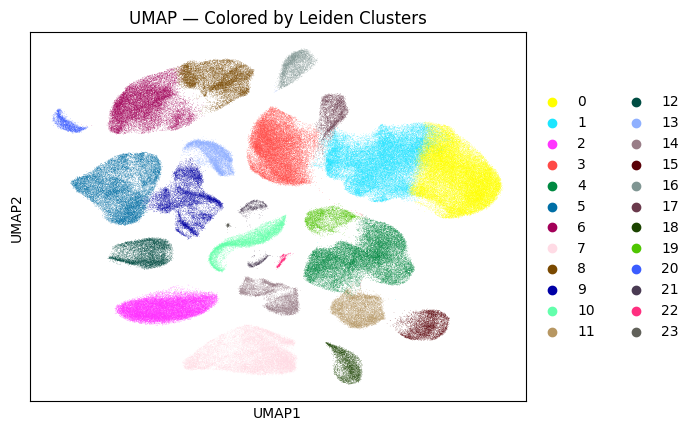

In [ ]:
sc.pl.umap(adata, color="leiden_clusters", title="UMAP — Colored by Leiden Clusters",save="_leiden.png")

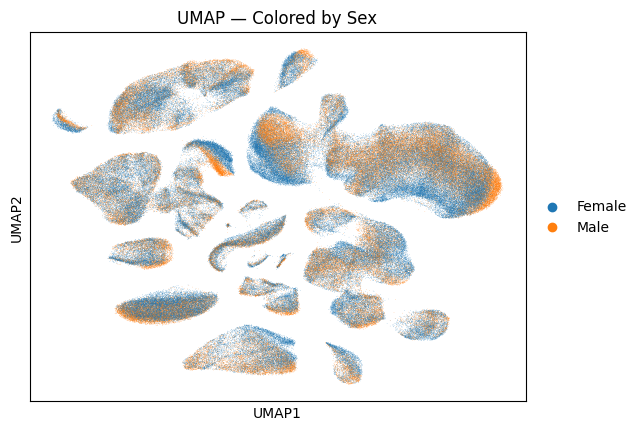

In [ ]:
sc.pl.umap(adata, color="Sex", title="UMAP — Colored by Sex",save="_sex.png")

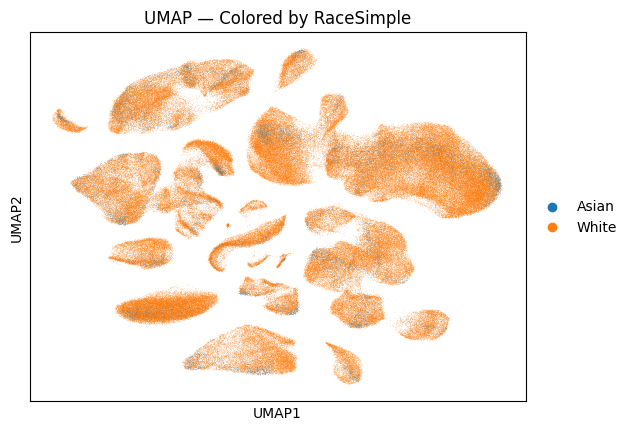

In [ ]:
sc.pl.umap(adata, color="RaceSimple", title="UMAP — Colored by RaceSimple",save="_race.png")

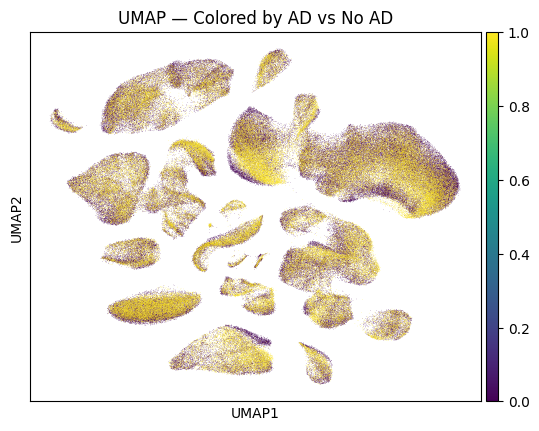

In [ ]:
sc.pl.umap(adata, color="disease_label", title="UMAP — Colored by AD vs No AD",save="_race.png")

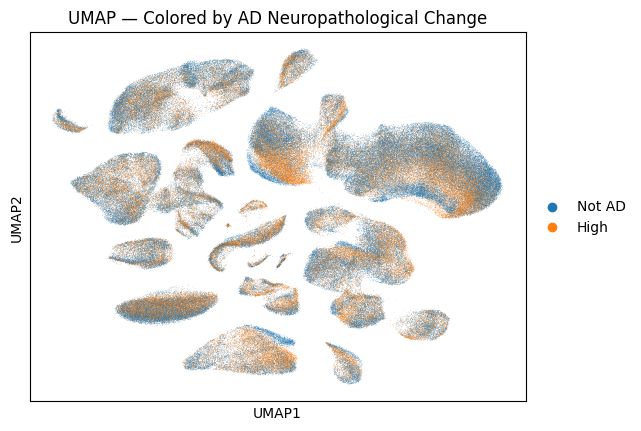

In [ ]:
sc.pl.umap(adata, color="Overall AD neuropathological Change", title="UMAP — Colored by AD Neuropathological Change",save="_ADvsNo.png")

# Patient Level

In [ ]:
H5AD_IN = DATA / "donor_concat_3class_HVG2000_each_with_ADbinary.h5ad"
OUT_DIR = DATA

LABEL_COL = "Overall AD neuropathological Change"
TASK = "AD_vs_NotAD"      # or "High_vs_NotAD"
SEX_TO_KEEP = None        # must match training

SCALER_PATH = os.path.join(OUT_DIR, "scaler_threshold_tuned.joblib")

In [11]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import joblib
from scipy.sparse import issparse

# ===============================
# CONFIG (must match training)
# ===============================
H5AD_IN = DATA / "donor_concat_3class_HVG2000_each_with_ADbinary.h5ad"
OUT_DIR = DATA

LABEL_COL = "Overall AD neuropathological Change"
TASK = "AD_vs_NotAD"      # or "High_vs_NotAD"
SEX_TO_KEEP = None        # must match training

SCALER_PATH = os.path.join(OUT_DIR, "scaler_threshold_tuned.joblib")

# ===============================
# Helpers (same logic as training)
# ===============================
def values_look_integerish(X, n_check=20000, tol=1e-6):
    from scipy.sparse import issparse
    if issparse(X):
        data = X.data
    else:
        data = np.ravel(X)

    if data.size == 0:
        return False
    if data.size > n_check:
        data = data[np.random.choice(data.size, n_check, replace=False)]

    data = data[np.isfinite(data)]
    if data.size == 0:
        return False

    return (np.abs(data - np.round(data)) < tol).mean() > 0.98


def ensure_normalized_log1p(adata):
    if "counts" in adata.layers:
        adata.X = adata.layers["counts"].copy()
        sc.pp.normalize_total(adata, target_sum=1e4)
        sc.pp.log1p(adata)
        return adata

    if adata.raw is not None:
        adata.X = adata.raw.X.copy()
        sc.pp.normalize_total(adata, target_sum=1e4)
        sc.pp.log1p(adata)
        return adata

    if values_look_integerish(adata.X):
        sc.pp.normalize_total(adata, target_sum=1e4)
        sc.pp.log1p(adata)

    return adata


def make_disease_label(obs, label_col, task):
    y = obs[label_col].astype(str)

    if task == "AD_vs_NotAD":
        mapping = {
            "Reference": 0, "Not AD": 0,
            "Low": 1, "Intermediate": 1, "High": 1
        }
        keep = y.isin(mapping)
        obs = obs.loc[keep].copy()
        obs["disease_label"] = obs[label_col].map(mapping).astype("int64")
        obs["disease_label_name"] = obs["disease_label"].map(
            {0: "Not AD", 1: "AD"}
        ).astype("category")
        return obs

    if task == "High_vs_NotAD":
        mapping = {"Reference": 0, "Not AD": 0, "High": 1}
        keep = y.isin(mapping)
        obs = obs.loc[keep].copy()
        obs["disease_label"] = obs[label_col].map(mapping).astype("int64")
        obs["disease_label_name"] = obs["disease_label"].map(
            {0: "Not AD", 1: "High"}
        ).astype("category")
        return obs

    raise ValueError(task)

# ===============================
# 1) Load + subset
# ===============================
adata = sc.read_h5ad(H5AD_IN)

if SEX_TO_KEEP is not None:
    adata = adata[adata.obs["Sex"].astype(str) == SEX_TO_KEEP].copy()

new_obs = make_disease_label(adata.obs.copy(), LABEL_COL, TASK)
adata = adata[new_obs.index].copy()
adata.obs = new_obs

# ===============================
# 2) Normalize / log
# ===============================
adata = ensure_normalized_log1p(adata)

# ===============================
# 3) Extract X (all samples)
# ===============================
X = adata.X
if issparse(X):
    X = X.toarray()
X = np.asarray(X, dtype=np.float32)

# ===============================
# 4) Apply saved scaler
# ===============================
scaler = joblib.load(SCALER_PATH)
X_scaled = scaler.transform(X).astype(np.float32)

# ===============================
# 5) Store in AnnData
# ===============================
adata.X = X_scaled
adata.layers["X_unscaled"] = X   # optional but useful
adata.uns["feature_scaling"] = {
    "scaler": "StandardScaler",
    "fit_on": "train_only",
    "task": TASK,
    "sex": SEX_TO_KEEP
}

# Optional: make explicit row id
adata.obs["row_id"] = np.arange(adata.n_obs)

print(adata)


AnnData object with n_obs × n_vars = 89 × 6000
    obs: 'n_cells_in_class', 'Sex', 'Age at Death', 'Organism', 'Overall AD neuropathological Change', 'Class', 'n_cells_GABA', 'n_cells_GLU', 'n_cells_NONNEUR', 'AD_binary', 'AD_label', 'disease_label', 'disease_label_name', 'row_id'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'gene', 'celltype_tag'
    uns: 'feature_scaling'
    layers: 'X_unscaled'


In [10]:
adata.obs['disease_label']

,disease_label
donor_id,
H18.30.001,0
H18.30.002,0
H19.30.001,0
H19.30.002,0
H19.33.004,0
...,...
H21.33.043,1
H21.33.044,1
H21.33.045,1


In [12]:
adata

AnnData object with n_obs × n_vars = 89 × 6000
    obs: 'n_cells_in_class', 'Sex', 'Age at Death', 'Organism', 'Overall AD neuropathological Change', 'Class', 'n_cells_GABA', 'n_cells_GLU', 'n_cells_NONNEUR', 'AD_binary', 'AD_label', 'disease_label', 'disease_label_name', 'row_id'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'gene', 'celltype_tag'
    uns: 'feature_scaling'
    layers: 'X_unscaled'

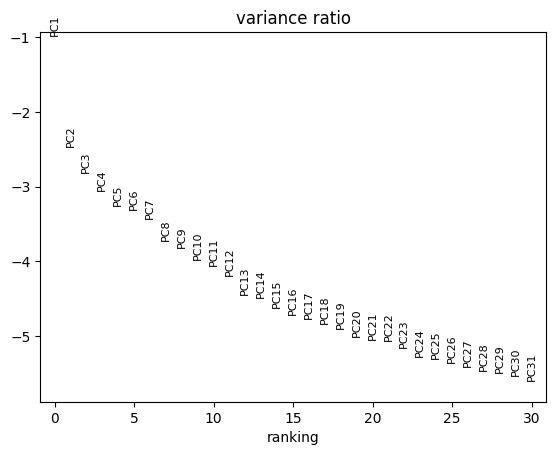

In [16]:
import scanpy as sc

#pca
sc.tl.pca(adata, n_comps=50, svd_solver="arpack")
sc.pl.pca_variance_ratio(adata, log=True)

# Neighbors graph from PCA
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)

# UMAP
sc.tl.umap(adata)

In [17]:
#leiden
sc.tl.leiden(adata, resolution=0.4, key_added="leiden_clusters")

/tmp/ipython-input-1361053012.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.4, key_added="leiden_clusters")


In [18]:
sc.settings.figdir = DATA

In [19]:
out_path = DATA / "EDA_patient_processed.h5ad"

In [20]:
adata.write_h5ad(out_path, compression="gzip")

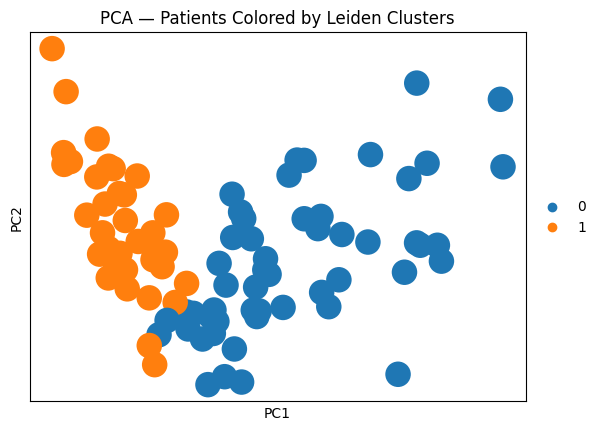

In [22]:
sc.pl.pca(adata, color="leiden_clusters", title="PCA — Patients Colored by Leiden Clusters",save="_leiden_pt.png")

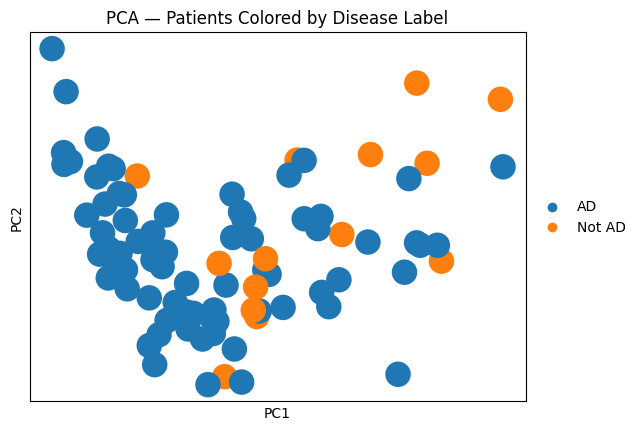

In [26]:
sc.pl.pca(
    adata,
    color="disease_label_name",
    title="PCA — Patients Colored by Disease Label",
    save="_disease_pt.png"
)


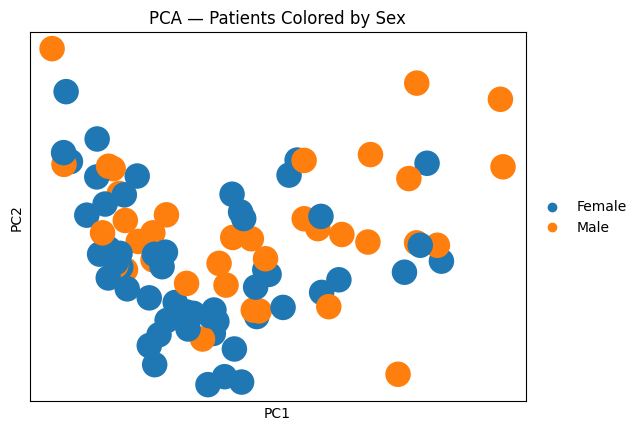

In [29]:
sc.pl.pca(adata, color="Sex", title="PCA — Patients Colored by Sex",save="_sex_pt.png")

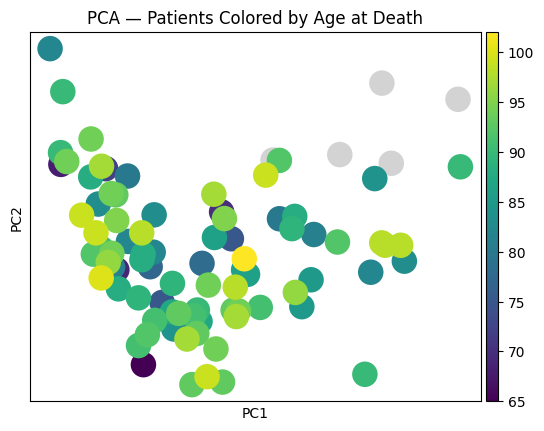

In [30]:
sc.pl.pca(adata, color="Age at Death", title="PCA — Patients Colored by Age at Death",save="_age_pt.png")

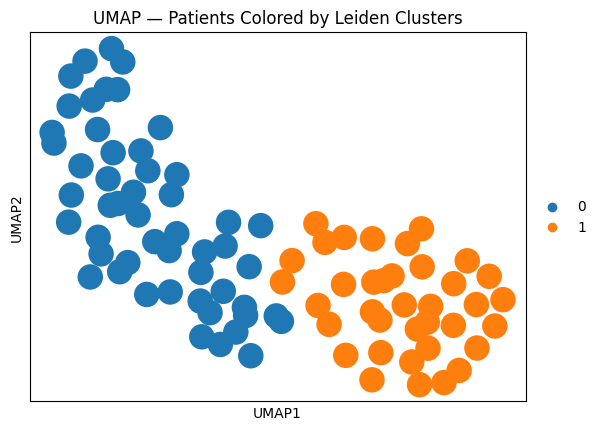

In [31]:
sc.pl.umap(adata, color="leiden_clusters", title="UMAP — Patients Colored by Leiden Clusters",save="_leiden_pt.png")

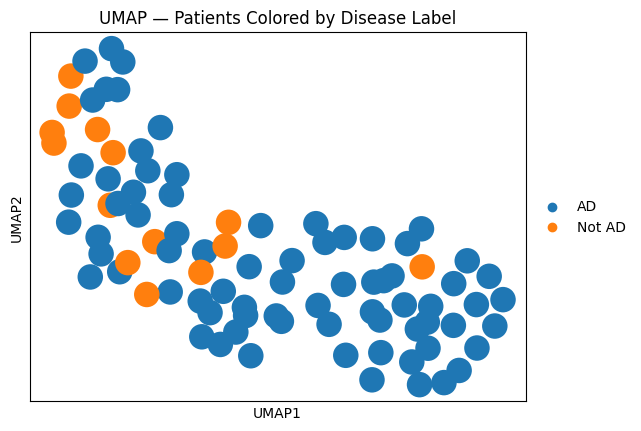

In [32]:
sc.pl.umap(
    adata,
    color="disease_label_name",
    title="UMAP — Patients Colored by Disease Label",
    save="_disease_pt.png"
)


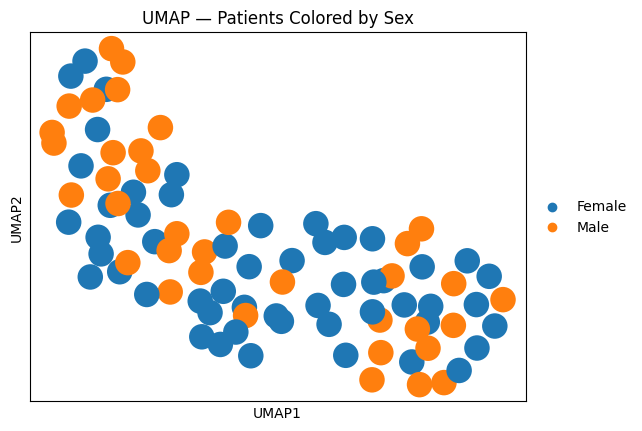

In [33]:
sc.pl.umap(adata, color="Sex", title="UMAP — Patients Colored by Sex",save="_sex_pt.png")

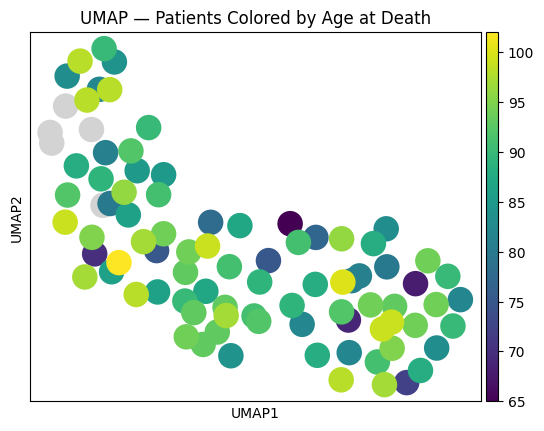

In [34]:
sc.pl.umap(adata, color="Age at Death", title="UMAP — Patients Colored by Age at Death",save="_age_pt.png")